# New York City Taxi Fare Prediction

### Reading the Dataset

In [1]:
import pandas as pd

In [2]:
## This is a sample datasettaken from the main dataset
data=pd.read_csv('taxifare.csv')

In [3]:
## Taking a sample dataset from the main dataset
df=data.sample(n=1200)

In [4]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
34415,2010-04-18 17:11:55 UTC,13.7,1,-73.961724,40.780550,-73.991512,40.763791,4
89191,2010-04-20 15:27:01 UTC,10.9,1,-73.965299,40.762866,-74.004577,40.742304,1
109367,2010-04-17 18:20:46 UTC,8.1,0,-73.995730,40.724783,-74.005154,40.739988,2
75143,2010-04-18 08:38:00 UTC,14.5,1,-73.930125,40.767052,-73.987828,40.747327,1
50595,2010-04-23 17:35:00 UTC,5.7,0,-73.987283,40.744778,-73.988727,40.755765,1


In [5]:
df.shape

(1200, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 34415 to 67121
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pickup_datetime    1200 non-null   object 
 1   fare_amount        1200 non-null   float64
 2   fare_class         1200 non-null   int64  
 3   pickup_longitude   1200 non-null   float64
 4   pickup_latitude    1200 non-null   float64
 5   dropoff_longitude  1200 non-null   float64
 6   dropoff_latitude   1200 non-null   float64
 7   passenger_count    1200 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 84.4+ KB


### Feature Engineering

In [7]:
import datetime

Converting 'pickup_datetime' into datetime and subtracting 4 hours since it is in UTC.

In [8]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])-datetime.timedelta(hours=4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 34415 to 67121
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   pickup_datetime    1200 non-null   datetime64[ns, UTC]
 1   fare_amount        1200 non-null   float64            
 2   fare_class         1200 non-null   int64              
 3   pickup_longitude   1200 non-null   float64            
 4   pickup_latitude    1200 non-null   float64            
 5   dropoff_longitude  1200 non-null   float64            
 6   dropoff_latitude   1200 non-null   float64            
 7   passenger_count    1200 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2)
memory usage: 84.4 KB


In [10]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
34415,2010-04-18 13:11:55+00:00,13.7,1,-73.961724,40.780550,-73.991512,40.763791,4
89191,2010-04-20 11:27:01+00:00,10.9,1,-73.965299,40.762866,-74.004577,40.742304,1
109367,2010-04-17 14:20:46+00:00,8.1,0,-73.995730,40.724783,-74.005154,40.739988,2
75143,2010-04-18 04:38:00+00:00,14.5,1,-73.930125,40.767052,-73.987828,40.747327,1
50595,2010-04-23 13:35:00+00:00,5.7,0,-73.987283,40.744778,-73.988727,40.755765,1


Extracting Year,Month,Day,Hours and Minutes from 'pickup_datetime'

In [11]:
df['Year']=df['pickup_datetime'].dt.year
df['Month']=df['pickup_datetime'].dt.month
df['Day']=df['pickup_datetime'].dt.day
df['Hours']=df['pickup_datetime'].dt.hour
df['Minutes']=df['pickup_datetime'].dt.minute

In [12]:
df.shape

(1200, 13)

In [13]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hours,Minutes
34415,2010-04-18 13:11:55+00:00,13.7,1,-73.961724,40.780550,-73.991512,40.763791,4,2010,4,18,13,11
89191,2010-04-20 11:27:01+00:00,10.9,1,-73.965299,40.762866,-74.004577,40.742304,1,2010,4,20,11,27
109367,2010-04-17 14:20:46+00:00,8.1,0,-73.995730,40.724783,-74.005154,40.739988,2,2010,4,17,14,20
75143,2010-04-18 04:38:00+00:00,14.5,1,-73.930125,40.767052,-73.987828,40.747327,1,2010,4,18,4,38
50595,2010-04-23 13:35:00+00:00,5.7,0,-73.987283,40.744778,-73.988727,40.755765,1,2010,4,23,13,35


Creating an extra feature 'mornight' for AM/PM infos from 'pickup_datetime'.

In [14]:
import numpy as np

In [15]:
df['mornight']=np.where(df['Hours']<12,0,1)

In [16]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hours,Minutes,mornight
34415,2010-04-18 13:11:55+00:00,13.7,1,-73.961724,40.780550,-73.991512,40.763791,4,2010,4,18,13,11,1
89191,2010-04-20 11:27:01+00:00,10.9,1,-73.965299,40.762866,-74.004577,40.742304,1,2010,4,20,11,27,0
109367,2010-04-17 14:20:46+00:00,8.1,0,-73.995730,40.724783,-74.005154,40.739988,2,2010,4,17,14,20,1
75143,2010-04-18 04:38:00+00:00,14.5,1,-73.930125,40.767052,-73.987828,40.747327,1,2010,4,18,4,38,0
50595,2010-04-23 13:35:00+00:00,5.7,0,-73.987283,40.744778,-73.988727,40.755765,1,2010,4,23,13,35,1


Dropping the 'pickup_datetime' feature since it is not required now.

In [17]:
df.drop('pickup_datetime',axis=1,inplace= True)

In [18]:
df.head()

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hours,Minutes,mornight
34415,13.7,1,-73.961724,40.780550,-73.991512,40.763791,4,2010,4,18,13,11,1
89191,10.9,1,-73.965299,40.762866,-74.004577,40.742304,1,2010,4,20,11,27,0
109367,8.1,0,-73.995730,40.724783,-74.005154,40.739988,2,2010,4,17,14,20,1
75143,14.5,1,-73.930125,40.767052,-73.987828,40.747327,1,2010,4,18,4,38,0
50595,5.7,0,-73.987283,40.744778,-73.988727,40.755765,1,2010,4,23,13,35,1


In [19]:
df.fare_class.unique()  #This is our target for classification problem

array([1, 0], dtype=int64)

#### Calculating the Haversine Distance

In [20]:
def haversine(df):
  """
  Calculate the Great Circle distance between two points
  on the Earth (specified in decimal degrees)

  """
  #Based on the formula X1=dropoff_latitude,X2=dropoff_longitude
  lat1=np.radians(df['pickup_latitude'])
  lat2=np.radians(df['dropoff_latitude'])

  dlat=np.radians(df['dropoff_latitude']-df['pickup_latitude'])
  dlong=np.radians(df['dropoff_longitude']-df['pickup_longitude'])
  a=np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlong/2)**2

  c=2* np.arctan2(np.sqrt(a),np.sqrt(1-a))
  r=6371 ##Radius of Earth in kms.Use 3956 for miles.
  return c*r

In [21]:
df['Total distance']=haversine(df)

In [22]:
df.head()

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hours,Minutes,mornight,Total distance
34415,13.7,1,-73.961724,40.780550,-73.991512,40.763791,4,2010,4,18,13,11,1,3.124883
89191,10.9,1,-73.965299,40.762866,-74.004577,40.742304,1,2010,4,20,11,27,0,4.021699
109367,8.1,0,-73.995730,40.724783,-74.005154,40.739988,2,2010,4,17,14,20,1,1.867904
75143,14.5,1,-73.930125,40.767052,-73.987828,40.747327,1,2010,4,18,4,38,0,5.332207
50595,5.7,0,-73.987283,40.744778,-73.988727,40.755765,1,2010,4,23,13,35,1,1.227739


Dropping 'pickup_longitude','pickup_latitude','dropoff_longitude'and'dropoff_latitude' since these are now not required.

In [23]:
df.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1,inplace=True)

In [24]:
df.head()

,fare_amount,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,mornight,Total distance
34415,13.7,1,4,2010,4,18,13,11,1,3.124883
89191,10.9,1,1,2010,4,20,11,27,0,4.021699
109367,8.1,0,2,2010,4,17,14,20,1,1.867904
75143,14.5,1,1,2010,4,18,4,38,0,5.332207
50595,5.7,0,1,2010,4,23,13,35,1,1.227739


### Storing the data in MongoDB

In [25]:
import json
records=json.loads(df.T.to_json()).values()

In [26]:
import pymongo
client=pymongo.MongoClient('mongodb://127.0.0.1:27017/')
db=client['newyorktaxifare']
col=db['rides']

In [27]:
records

dict_values([{'fare_amount': 13.7, 'fare_class': 1.0, 'passenger_count': 4.0, 'Year': 2010.0, 'Month': 4.0, 'Day': 18.0, 'Hours': 13.0, 'Minutes': 11.0, 'mornight': 1.0, 'Total distance': 3.1248829686}, {'fare_amount': 10.9, 'fare_class': 1.0, 'passenger_count': 1.0, 'Year': 2010.0, 'Month': 4.0, 'Day': 20.0, 'Hours': 11.0, 'Minutes': 27.0, 'mornight': 0.0, 'Total distance': 4.0216991748}, {'fare_amount': 8.1, 'fare_class': 0.0, 'passenger_count': 2.0, 'Year': 2010.0, 'Month': 4.0, 'Day': 17.0, 'Hours': 14.0, 'Minutes': 20.0, 'mornight': 1.0, 'Total distance': 1.8679044016}, {'fare_amount': 14.5, 'fare_class': 1.0, 'passenger_count': 1.0, 'Year': 2010.0, 'Month': 4.0, 'Day': 18.0, 'Hours': 4.0, 'Minutes': 38.0, 'mornight': 0.0, 'Total distance': 5.3322067822}, {'fare_amount': 5.7, 'fare_class': 0.0, 'passenger_count': 1.0, 'Year': 2010.0, 'Month': 4.0, 'Day': 23.0, 'Hours': 13.0, 'Minutes': 35.0, 'mornight': 1.0, 'Total distance': 1.2277391765}, {'fare_amount': 4.9, 'fare_class': 0.0, 

In [28]:
col.insert_many(records)

### Feature Selection

In [29]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [30]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

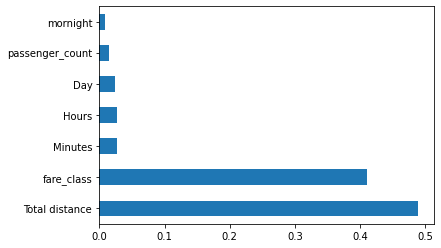

In [31]:
##Plotting Graph of feature importance for better visualization

feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

In [32]:
X.head()

,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,mornight,Total distance
34415,1,4,2010,4,18,13,11,1,3.124883
89191,1,1,2010,4,20,11,27,0,4.021699
109367,0,2,2010,4,17,14,20,1,1.867904
75143,1,1,2010,4,18,4,38,0,5.332207
50595,0,1,2010,4,23,13,35,1,1.227739


In [33]:
y.head()

34415     13.7
89191     10.9
109367     8.1
75143     14.5
50595      5.7
Name: fare_amount, dtype: float64

### Regression Model

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [35]:
import xgboost

In [36]:
regressor=xgboost.XGBRegressor()
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:
y_pred=regressor.predict(X_test)

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
import seaborn as sns

c:\users\swarnava\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

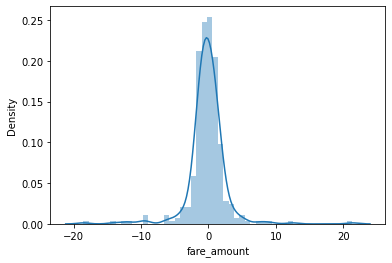

In [40]:
sns.distplot(y_test-y_pred)

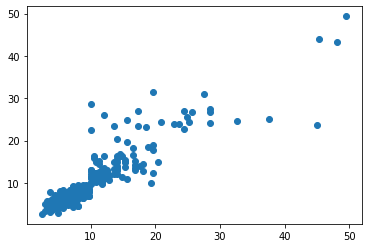

In [41]:
plt.scatter(y_test,y_pred)

In [42]:
from sklearn import metrics
print('R-Square:',np.sqrt(metrics.r2_score(y_test,y_pred)))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

R-Square: 0.9034141859693819
MAE: 1.606682827260759
MSE: 8.049489522325366
RMSE: 2.8371622305263697


### Hyperparameter Tuning

In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [44]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [45]:
# RandomizedSearchCV

## Number of trees in Xgboost
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]

## Various learning rate parameters
learning_rate=['0.05','0.1','0.2','0.3','0.5','0.6']

## Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=6)]

## max_depth.append(None)

## Subsample parameter values
subsample=[0.7,0.6,0.8]

## Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

In [46]:
## Create the Random grid

random_grid={'n_estimators': n_estimators,
            'learning_rate': learning_rate,
            'max_depth': max_depth,
            'subsample': subsample,
            'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [47]:
## Use the random_grid to search for the best parameters
## first we create the base model to tune

regressor=xgboost.XGBRegressor()

In [48]:
## Random search of parameters using 3-folds CV
## search accross 100 different combinations

xg_random= RandomizedSearchCV(estimator=regressor,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=5,cv=5,verbose=2,random_state=42,n_jobs=-1)

In [49]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=5, n_jobs=-1,
                   para

In [50]:
xg_random.best_params_

{'subsample': 0.8,
 'n_estimators': 1100,
 'min_child_weight': 6,
 'max_depth': 25,
 'learning_rate': '0.05'}

In [51]:
y_pred=xg_random.predict(X_test)

c:\users\swarnava\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

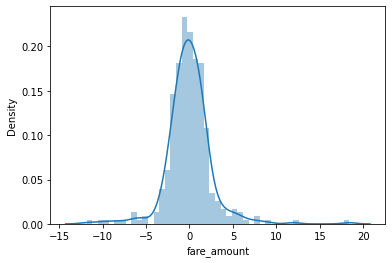

In [52]:
sns.distplot(y_test-y_pred)

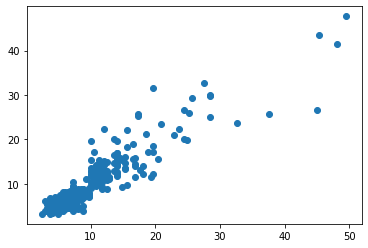

In [53]:
plt.scatter(y_test,y_pred)

In [54]:
from sklearn import metrics
print('R-Square:',np.sqrt(metrics.r2_score(y_test,y_pred)))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

R-Square: 0.9198031106585797
MAE: 1.6826393676333955
MSE: 6.741179750725233
RMSE: 2.596378198707814


### Classification Model

In [55]:
df.head()

,fare_amount,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,mornight,Total distance
34415,13.7,1,4,2010,4,18,13,11,1,3.124883
89191,10.9,1,1,2010,4,20,11,27,0,4.021699
109367,8.1,0,2,2010,4,17,14,20,1,1.867904
75143,14.5,1,1,2010,4,18,4,38,0,5.332207
50595,5.7,0,1,2010,4,23,13,35,1,1.227739


In [56]:
df.to_csv('final_data.csv',index=False)

In [81]:
import pandas as pd
df=pd.read_csv('final_data.csv',index_col=False)

In [82]:
df.head()

,fare_amount,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,mornight,Total distance
0,13.7,1,4,2010,4,18,13,11,1,3.124883
1,10.9,1,1,2010,4,20,11,27,0,4.021699
2,8.1,0,2,2010,4,17,14,20,1,1.867904
3,14.5,1,1,2010,4,18,4,38,0,5.332207
4,5.7,0,1,2010,4,23,13,35,1,1.227739


In [85]:
X=df.iloc[:,[0,2,3,4,5,6,7,8,9]]
y=df.iloc[:,1]

In [86]:
X

,fare_amount,passenger_count,Year,Month,Day,Hours,Minutes,mornight,Total distance
0,13.70,4,2010,4,18,13,11,1,3.124883
1,10.90,1,2010,4,20,11,27,0,4.021699
2,8.10,2,2010,4,17,14,20,1,1.867904
3,14.50,1,2010,4,18,4,38,0,5.332207
4,5.70,1,2010,4,23,13,35,1,1.227739
...,...,...,...,...,...,...,...,...,...
1195,8.10,3,2010,4,15,5,55,0,2.205743
1196,32.67,1,2010,4,11,9,19,0,4.817990
1197,5.30,1,2010,4,16,18,58,1,1.458881
1198,3.70,1,2010,4,21,21,16,1,1.111794


In [65]:
y

0       1
1       1
2       0
3       1
4       0
       ..
1195    0
1196    1
1197    0
1198    0
1199    0
Name: fare_class, Length: 1200, dtype: int64

### Feature Selection

In [88]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

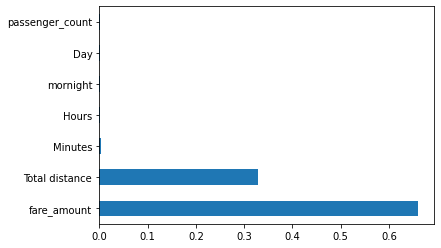

In [90]:
##Plot graph of feature importance for better visualizations

feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

In [91]:
X.head()

,fare_amount,passenger_count,Year,Month,Day,Hours,Minutes,mornight,Total distance
0,13.7,4,2010,4,18,13,11,1,3.124883
1,10.9,1,2010,4,20,11,27,0,4.021699
2,8.1,2,2010,4,17,14,20,1,1.867904
3,14.5,1,2010,4,18,4,38,0,5.332207
4,5.7,1,2010,4,23,13,35,1,1.227739


In [92]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fare_class, dtype: int64

In [93]:
y.value_counts()

0    775
1    425
Name: fare_class, dtype: int64

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [97]:
y_pred=classifier.predict(X_test)

In [98]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred)
score=accuracy_score(y_test,y_pred)
print(cm)
print(score)

[[241   0]
 [  0 119]]
1.0


seems like a overfitting problem! Let's hyperparameter tune the model..

### Hyperparameter Tuning

In [114]:
from sklearn.model_selection import RandomizedSearchCV

In [115]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [122]:
# RandomizedSearchCV

## Number of trees in Xgboost
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]

## Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=6)]

min_samples_split=[2,5,10,15,100]

min_samples_leaf=[1,2,5,10]

In [123]:
random_grid={'n_estimators': n_estimators,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [124]:
xg_random= RandomizedSearchCV(estimator=classifier,param_distributions=random_grid,scoring=None,n_iter=5,cv=5,verbose=2,n_jobs=1)

In [125]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END max_depth=15, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   6.6s
[CV] END max_depth=15, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   6.4s
[CV] END max_depth=15, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   6.3s
[CV] END max_depth=15, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   6.7s
[CV] END max_depth=15, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   6.8s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   4.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   4.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   3.8s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=700; total time=   3.9s
[CV] END max_dept

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   verbose=2)

In [126]:
xg_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 10,
 'max_depth': 15}

In [127]:
y_pred=xg_random.predict(X_test)

In [128]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm=confusion_matrix(y_test,y_pred)
score=accuracy_score(y_test,y_pred)
print(cm)
print(score)

[[241   0]
 [  0 119]]
1.0


It's not an overfitting problem!